In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# General Packages for data handling and operations
import numpy as np
import pandas as pd
import os
import re

from datetime import datetime
# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pylab import rcParams
%matplotlib inline
plt.style.use("ggplot")
#rcParams["figure.figsize"] = 14, 6

# NLP packages
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter

# Machine Learning packages
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans

# For displaying images within IPython notebook
from IPython.display import Image                   



In [3]:
review_df = pd.read_csv("Reviews.csv")
review_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
review_df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
review_df=review_df.dropna()
review_df.isnull().sum(axis=0)

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [6]:
review_df=review_df[pd.notnull(review_df["Text"])]
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568401 non-null  int64 
 1   ProductId               568401 non-null  object
 2   UserId                  568401 non-null  object
 3   ProfileName             568401 non-null  object
 4   HelpfulnessNumerator    568401 non-null  int64 
 5   HelpfulnessDenominator  568401 non-null  int64 
 6   Score                   568401 non-null  int64 
 7   Time                    568401 non-null  int64 
 8   Summary                 568401 non-null  object
 9   Text                    568401 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [7]:
col = ["Score","Text"]
review_df =review_df[col]
review_df.head(2)

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...


In [8]:
review_df["Text"]=review_df["Text"].astype(str)
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Score   568401 non-null  int64 
 1   Text    568401 non-null  object
dtypes: int64(1), object(1)
memory usage: 13.0+ MB


In [9]:
print(review_df["Text"].str.slice(0, 5).head())


0    I hav
1    Produ
2    This 
3    If yo
4    Great
Name: Text, dtype: object


In [10]:
review_df["Score"].value_counts()

Score
5    363102
4     80654
1     52264
3     42638
2     29743
Name: count, dtype: int64

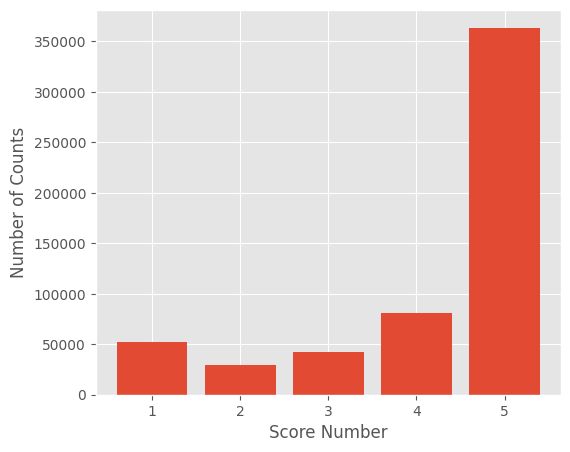

In [11]:
#calucuateing for the score counts
Score_counts =review_df["Score"].value_counts()
#calculating the total counts
total_counts=Score_counts.sum()
#Calucating the percentages
Score_percentages =(Score_counts/total_counts)*100
#Plottings
plt.figure(figsize =(6,5))
plt.bar(Score_counts.index, Score_counts.values)# use index and values to align data correctly
plt.xlabel("Score Number")
plt.ylabel("Number of Counts")
plt.savefig("static/images/score_count.png")
plt.show()

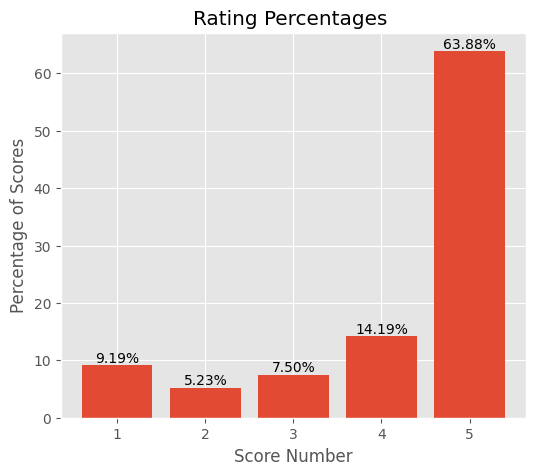

In [12]:
#plotting
plt.figure(figsize=(6,5))
bars=plt.bar(Score_percentages.index,Score_percentages.values)
#adding text labels 
for bar in bars:
    yval = bar.get_height()# get the height for the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha ="center",va="bottom")# position text
plt.xlabel("Score Number")
plt.ylabel("Percentage of Scores")
plt.title("Rating Percentages ")
plt.savefig("static/images/percentage_rating.png")
plt.show()

In [13]:
#More Analysis on the Score column
score_df =review_df.copy()
score_df.head(1)

,Score,Text
0,5,I have bought several of the Vitality canned d...


In [14]:
#calculate for the score counts
Score_counts = score_df["Score"].value_counts()
Score_counts

Score
5    363102
4     80654
1     52264
3     42638
2     29743
Name: count, dtype: int64

In [15]:
# Total Counts 
total_counts = Score_counts.sum()
total_counts


568401

In [16]:
score_percentage= (Score_counts/total_counts)*100
score_percentage

Score
5    63.881309
4    14.189630
1     9.194917
3     7.501394
2     5.232749
Name: count, dtype: float64

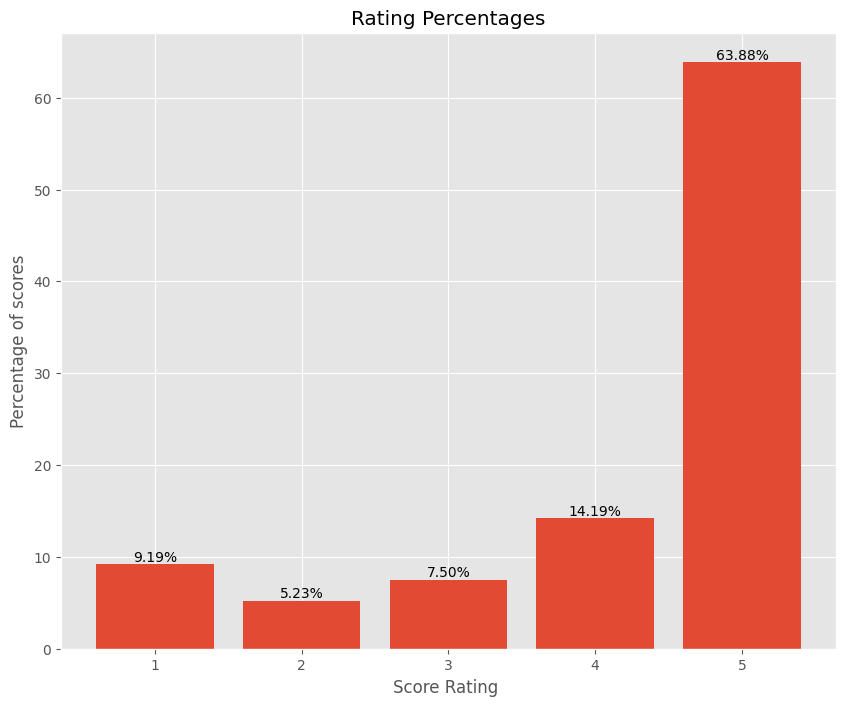

In [17]:
#plot the percentile
plt.figure(figsize=(10,8))
bars=plt.bar(score_percentage.index,score_percentage.values)
#adding text labels
for bar in bars:
    yval=bar.get_height() # get the height for the bar
    plt.text(bar.get_x() +bar.get_width()/2, yval,f"{yval:.2f}%",ha="center",va="bottom") # position text
plt.xlabel("Score Rating ")
plt.ylabel("Percentage of scores")
plt.title("Rating Percentages")
plt.savefig("static/images/percentage_rating.png")
plt.show()

In [18]:
score_df=score_df[score_df["Score"]!=3]
score_df.Score.value_counts()

Score
5    363102
4     80654
1     52264
2     29743
Name: count, dtype: int64

In [19]:
score_df["sentiment_score"]=score_df["Score"].apply(lambda x: "Positive" if x >3 else "Negative")
score_df["sentiment_score"].value_counts()

sentiment_score
Positive    443756
Negative     82007
Name: count, dtype: int64

In [20]:
positive_negative_rate = 100*score_df["sentiment_score"].value_counts()/len(score_df)
positive_negative_rate

sentiment_score
Positive    84.402288
Negative    15.597712
Name: count, dtype: float64

In [21]:
#plot positve_negative_rate
value_counts=score_df["sentiment_score"].value_counts()
value_counts

sentiment_score
Positive    443756
Negative     82007
Name: count, dtype: int64

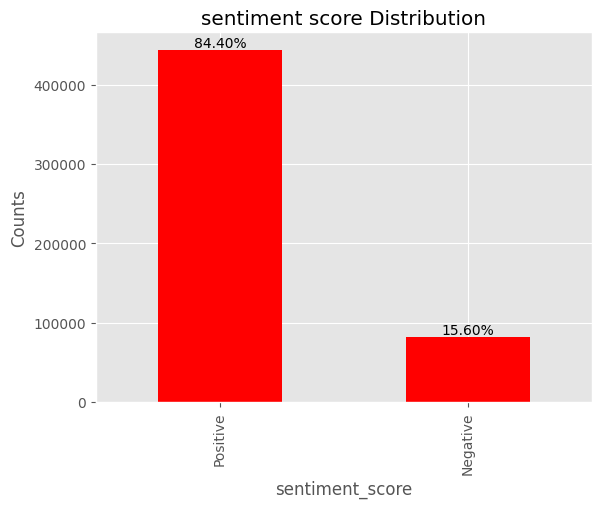

In [22]:
percentages=(value_counts/value_counts.sum())*100
#plotting
ax = value_counts.plot.bar(color="red")
#adding the percentile labels on the top of each bar
for i,(value,percentage) in enumerate(zip(value_counts,percentages)):
    ax.text(i, value,f"{percentage:.2f}%",ha = "center",va="bottom")
plt.ylabel("Counts")
plt.title("sentiment score Distribution")
plt.savefig("static/images/score_sentiment.png")
plt.show()


cleaning the Text reviews


In [23]:
#convert to lower case 
review_df["Text"]=review_df["Text"].str.lower()
review_df.head()

,Score,Text
0,5,i have bought several of the vitality canned d...
1,1,product arrived labeled as jumbo salted peanut...
2,4,this is a confection that has been around a fe...
3,2,if you are looking for the secret ingredient i...
4,5,great taffy at a great price. there was a wid...


In [24]:
#define a function clean the text 
def clean(text): 
#remove all special characters 
    text=re.sub("[^A-Za-z]+"," ",str(text))
    return text
#cleaning the text in the TExt column 
review_df["Text"]=review_df["Text"].apply(clean)
review_df

,Score,Text
0,5,i have bought several of the vitality canned d...
1,1,product arrived labeled as jumbo salted peanut...
2,4,this is a confection that has been around a fe...
3,2,if you are looking for the secret ingredient i...
4,5,great taffy at a great price there was a wide ...
...,...,...
568449,5,great for sesame chicken this is a good if not...
568450,2,i m disappointed with the flavor the chocolate...
568451,5,these stars are small so you can give of those...
568452,5,these are the best treats for training and rew...


In [25]:
import nltk
nltk.download("punkt") #sentence tokenization

[nltk_data] Downloading package punkt to C:\Users\Michael
[nltk_data]     Haile\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
%%time
review_df["sentences"]=review_df.Text.apply(lambda x: nltk.sent_tokenize(x))
review_df.head()

CPU times: total: 7.75 s
Wall time: 11.7 s


,Score,Text,sentences
0,5,i have bought several of the vitality canned d...,[i have bought several of the vitality canned ...
1,1,product arrived labeled as jumbo salted peanut...,[product arrived labeled as jumbo salted peanu...
2,4,this is a confection that has been around a fe...,[this is a confection that has been around a f...
3,2,if you are looking for the secret ingredient i...,[if you are looking for the secret ingredient ...
4,5,great taffy at a great price there was a wide ...,[great taffy at a great price there was a wide...


In [27]:
import nltk
#Tokenninzing the Text
review_df["Text_tok"]=review_df["Text"].apply(lambda x: nltk.sent_tokenize(x))
review_df.head()

,Score,Text,sentences,Text_tok
0,5,i have bought several of the vitality canned d...,[i have bought several of the vitality canned ...,[i have bought several of the vitality canned ...
1,1,product arrived labeled as jumbo salted peanut...,[product arrived labeled as jumbo salted peanu...,[product arrived labeled as jumbo salted peanu...
2,4,this is a confection that has been around a fe...,[this is a confection that has been around a f...,[this is a confection that has been around a f...
3,2,if you are looking for the secret ingredient i...,[if you are looking for the secret ingredient ...,[if you are looking for the secret ingredient ...
4,5,great taffy at a great price there was a wide ...,[great taffy at a great price there was a wide...,[great taffy at a great price there was a wide...


In [28]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = stopwords.words("english")
stop_words

filtered_sent=[]
for w in review_df.sentences: 
    if w not in stop_words: 
        filtered_sent.append(w)
print("Tokenized Sentences: ", review_df.sentences)
print("Filtered Sentence:",filtered_sent)
review_df["filtered_sent"]=filtered_sent
review_df.head()

[nltk_data] Downloading package stopwords to C:\Users\Michael
[nltk_data]     Haile\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



,Score,Text,sentences,Text_tok,filtered_sent
0,5,i have bought several of the vitality canned d...,[i have bought several of the vitality canned ...,[i have bought several of the vitality canned ...,[i have bought several of the vitality canned ...
1,1,product arrived labeled as jumbo salted peanut...,[product arrived labeled as jumbo salted peanu...,[product arrived labeled as jumbo salted peanu...,[product arrived labeled as jumbo salted peanu...
2,4,this is a confection that has been around a fe...,[this is a confection that has been around a f...,[this is a confection that has been around a f...,[this is a confection that has been around a f...
3,2,if you are looking for the secret ingredient i...,[if you are looking for the secret ingredient ...,[if you are looking for the secret ingredient ...,[if you are looking for the secret ingredient ...
4,5,great taffy at a great price there was a wide ...,[great taffy at a great price there was a wide...,[great taffy at a great price there was a wide...,[great taffy at a great price there was a wide...


In [29]:
#create a list of all sentences 

all_sentences = []
for o in range(len(review_df)):
    l = len(review_df.iloc[o]["filtered_sent"])
    for p in range(l):
        t = review_df.iloc[o]["filtered_sent"][p]
        all_sentences.append(t)   

In [30]:
#create a new dataframeabs
df_sentences = pd.DataFrame()
df_sentences["all_sentences"]=all_sentences

In [31]:
df_sentences

,all_sentences
0,i have bought several of the vitality canned d...
1,product arrived labeled as jumbo salted peanut...
2,this is a confection that has been around a fe...
3,if you are looking for the secret ingredient i...
4,great taffy at a great price there was a wide ...
...,...
568395,great for sesame chicken this is a good if not...
568396,i m disappointed with the flavor the chocolate...
568397,these stars are small so you can give of those...
568398,these are the best treats for training and rew...


In [32]:
df_sentences.isnull().values.any()

False

In [33]:
#create functions to obtain Polarity, values and label the Text based on the polarity 

def getPolarity(all_sentences): 
    return TextBlob(all_sentences).sentiment.polarity

#function to anlyze the all_sentences

def analysis(score): 
    if score < 0: 
        return "Negative"
    elif score == 0: 
        return "Neutral"
    else:
        return "Positive"
    

Apply The above funcitons

In [34]:
df_sentences["Polarity"]=df_sentences["all_sentences"].apply(getPolarity)
df_sentences["Sentiment"]=df_sentences["Polarity"].apply(analysis)

#remove Analysis that is Neutral 
df_sentences=df_sentences[df_sentences["Sentiment"]!="Neutral"]
df_sentences=df_sentences.loc[:,["all_sentences","Polarity","Sentiment"]]
df_sentences


,all_sentences,Polarity,Sentiment
0,i have bought several of the vitality canned d...,0.450000,Positive
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative
2,this is a confection that has been around a fe...,0.133571,Positive
3,if you are looking for the secret ingredient i...,0.166667,Positive
4,great taffy at a great price there was a wide ...,0.483333,Positive
...,...,...,...
568395,great for sesame chicken this is a good if not...,0.204167,Positive
568396,i m disappointed with the flavor the chocolate...,-0.208333,Negative
568397,these stars are small so you can give of those...,-0.021875,Negative
568398,these are the best treats for training and rew...,0.521429,Positive


In [35]:
df_sentences["Sentiment"].value_counts()

Sentiment
Positive    503171
Negative     57440
Name: count, dtype: int64

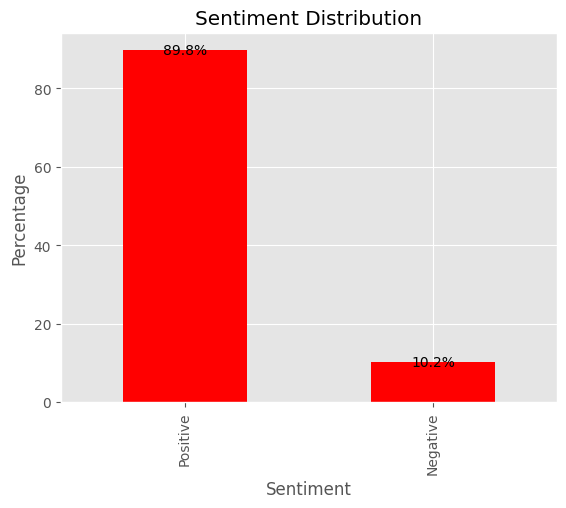

In [36]:

# Calculate the counts and then the percentage
value_counts = df_sentences["Sentiment"].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Creating the bar plot
ax = percentages.plot.bar(color='red')

# Annotating the bar plot with percentage labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution')
plt.show()


In [37]:
Positive_Negative_Polarity = 100*df_sentences["Sentiment"].value_counts()/len(df_sentences)
Positive_Negative_Polarity

Sentiment
Positive    89.754036
Negative    10.245964
Name: count, dtype: float64

In [38]:
#removing stopwords and high/low frequency wordsabs
from nltk.corpus import stopwords
noise_words = []
eng_stop_words = stopwords.words("english")
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
#removing stop words 
stop_words = set(eng_stop_words)
without_stop_words=[]
stopword =[]
Text=review_df["Text"][0]
words = nltk.word_tokenize(Text)

for word in words:
    if word in stop_words: 
        stopword.append(word) 
    else:
        without_stop_words.append(word) 


In [40]:
print("-- Original sentence--\n", all_sentences[0])
print("\n--stopwords in the sentence--\n",stopword)
print("\n--non-stopwords in the sentences --\n",without_stop_words)

-- Original sentence--
 i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most

--stopwords in the sentence--
 ['i', 'have', 'of', 'the', 'and', 'have', 'them', 'all', 'to', 'be', 'of', 'the', 'more', 'a', 'than', 'a', 'and', 'it', 'my', 'is', 'and', 'she', 'this', 'than', 'most']

--non-stopwords in the sentences --
 ['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better']


In [41]:
def stopwords_removal(stop_words, sentence): 
    return[word for word in nltk.word_tokenize(sentence) if word not in stop_words] 
review_df["Text_nonstop"]=review_df["Text"].apply(lambda row: stopwords_removal(stop_words, row))

review_df =review_df[["Text","Text_nonstop"]]
review_df

,Text,Text_nonstop
0,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,..."
1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea..."
2,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy..."
3,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli..."
4,great taffy at a great price there was a wide ...,"[great, taffy, great, price, wide, assortment,..."
...,...,...
568449,great for sesame chicken this is a good if not...,"[great, sesame, chicken, good, better, restura..."
568450,i m disappointed with the flavor the chocolate...,"[disappointed, flavor, chocolate, notes, espec..."
568451,these stars are small so you can give of those...,"[stars, small, give, one, training, session, t..."
568452,these are the best treats for training and rew...,"[best, treats, training, rewarding, dog, good,..."


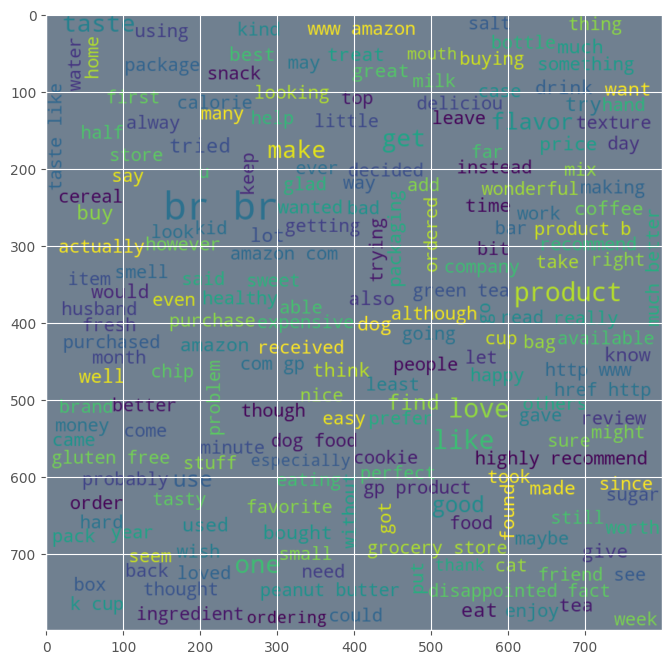

In [42]:
# Create wordcloud  to see most frequenty used words in all_sentences 

from nltk.corpus import stopwords
from wordcloud import WordCloud

stop_words = set(stopwords.words("english"))
textt = " ".join(review for review in df_sentences["all_sentences"])

wordcloud = WordCloud(width = 800, height = 800, max_font_size=50,min_font_size = 10,
                stopwords =  stop_words, background_color="slategray").generate(textt)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.savefig("static/images/wordcloud.png",dpi=150)
plt.show()


from the above some popular words can be observed include love, good , taset, sugar..absthese words are mostly positive, indicating that most reviews in the dataset express a positive sentiment



# More Data Analysis


In [43]:
positive_sentiment = df_sentences[df_sentences["Sentiment"]=="Positive"]
negative_sentiment=df_sentences[df_sentences["Sentiment"]=="Negative"]
negative_sentiment.head(2)

,all_sentences,Polarity,Sentiment
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative
14,the strawberry twizzlers are my guilty pleasur...,-0.500000,Negative


# WordCloud Positive Sentiment

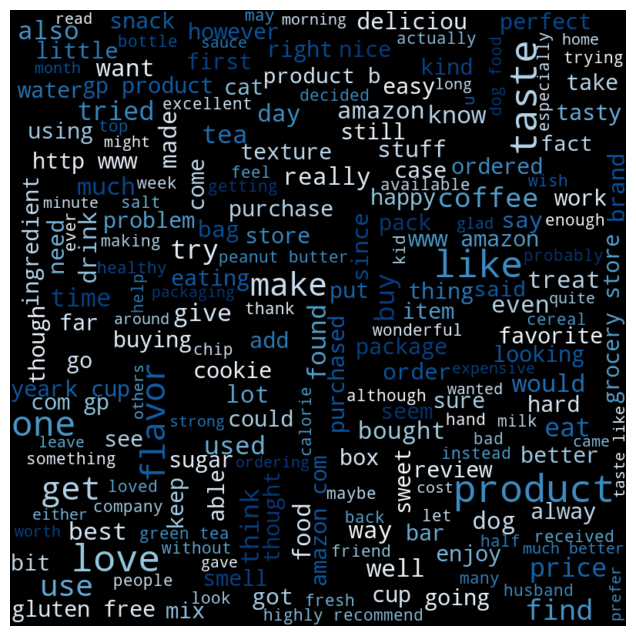

CPU times: total: 1min 22s
Wall time: 1min 38s


In [44]:
%%time
stop_words = set(stopwords.words("english"))
stop_words.update(["br", "href","good","great"]) # adding additinal words to stop_words 

# good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive_sentiment["all_sentences"])
wordcloud2 = WordCloud(width = 800, height = 800, max_font_size=50,min_font_size = 10,
                stopwords =  stop_words, colormap="Blues").generate(pos)
plt.figure(figsize = (10, 8)) 
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('static/images/positive_wordcloud.png',dpi=150 )
plt.show()

in the above the positive sentiment word cloud shows words such as taste, thought, better, flavor
product, like, love, 

# wordcloud -Negative sentiment

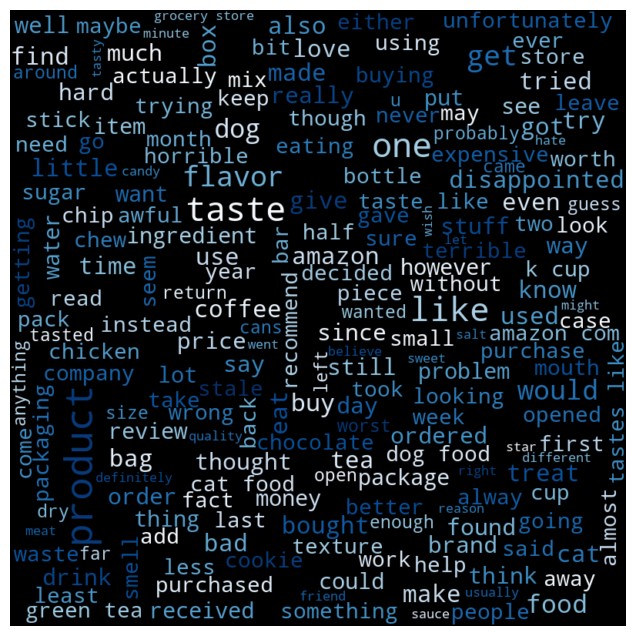

In [45]:
neg = " ".join(review for review in negative_sentiment["all_sentences"])
wordcloud3 = WordCloud(width = 800, height = 800, max_font_size=50,min_font_size = 10,
                stopwords =  stop_words, colormap="Blues").generate(neg)
plt.figure(figsize = (10,8)) 
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('static/images/negative_wordcloud.png', dpi=150)
plt.show()

# Data Modeling

In [46]:
df_sentences

,all_sentences,Polarity,Sentiment
0,i have bought several of the vitality canned d...,0.450000,Positive
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative
2,this is a confection that has been around a fe...,0.133571,Positive
3,if you are looking for the secret ingredient i...,0.166667,Positive
4,great taffy at a great price there was a wide ...,0.483333,Positive
...,...,...,...
568395,great for sesame chicken this is a good if not...,0.204167,Positive
568396,i m disappointed with the flavor the chocolate...,-0.208333,Negative
568397,these stars are small so you can give of those...,-0.021875,Negative
568398,these are the best treats for training and rew...,0.521429,Positive


In [47]:
df_sentences=df_sentences.drop_duplicates(keep="first")
df_sentences

,all_sentences,Polarity,Sentiment
0,i have bought several of the vitality canned d...,0.450000,Positive
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative
2,this is a confection that has been around a fe...,0.133571,Positive
3,if you are looking for the secret ingredient i...,0.166667,Positive
4,great taffy at a great price there was a wide ...,0.483333,Positive
...,...,...,...
568395,great for sesame chicken this is a good if not...,0.204167,Positive
568396,i m disappointed with the flavor the chocolate...,-0.208333,Negative
568397,these stars are small so you can give of those...,-0.021875,Negative
568398,these are the best treats for training and rew...,0.521429,Positive


In [48]:

#taking the first 100000 of the dtatframe for the sake of run time

df_sentences = df_sentences.iloc[:100000]
df_sentences


,all_sentences,Polarity,Sentiment
0,i have bought several of the vitality canned d...,0.450000,Positive
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative
2,this is a confection that has been around a fe...,0.133571,Positive
3,if you are looking for the secret ingredient i...,0.166667,Positive
4,great taffy at a great price there was a wide ...,0.483333,Positive
...,...,...,...
116064,great packing in prefect condition very good u...,0.803333,Positive
116065,if your looking for very hot this is not it bu...,0.061458,Positive
116066,i greatly enjoyed this hot sauce and can t wai...,0.274020,Positive
116067,just tried this sauce and simply put it s terr...,-0.120370,Negative


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words="english", max_df=0.7)
X = vectorizer.fit_transform(df_sentences.all_sentences)
y = df_sentences.Sentiment

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [50]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((80000, 55756), (20000, 55756), (80000,), (20000,))

In [51]:
%%time
models = []
models.append(('LR', LogisticRegression(solver="saga", multi_class="auto")))
models.append(("MNB", MultinomialNB()))
models.append(("MLP", MLPClassifier(hidden_layer_sizes=(10, ), activation="relu", random_state=0)))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.935150 (0.000680)
MNB: 0.899438 (0.000151)
MLP: 0.918588 (0.002564)
SVM: 0.899537 (0.000057)
KNN: 0.899525 (0.001200)
CPU times: total: 2h 46min 11s
Wall time: 7h 59min 27s


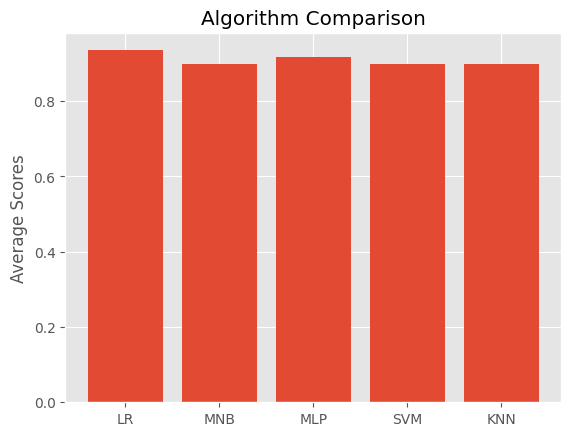

In [52]:
import numpy as np
import matplotlib.pyplot as pyplot

# Calculate mean scores for each algorithm if 'results' is a list of lists
mean_scores = [np.mean(r) for r in results]

positions = range(len(names))

pyplot.bar(positions, mean_scores, tick_label=names)
pyplot.title('Algorithm Comparison')
pyplot.ylabel('Average Scores')
plt.savefig('static/images/algorithm_comparison.png', dpi=150)
pyplot.show()


# Testing

In [53]:
# Evaluate the models
def train_test(X_train, X_test, y_train, y_test, classifier):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    
    print("Train score: {:.2f}".format(classifier.score(X_train, y_train)))
    print("Test score: {:.2f}\n".format(classifier.score(X_test, y_test)))
    print("Classification report:\n{}".format(classification_report(y_test, pred, zero_division=0)))
    print(confusion_matrix(y_test,pred))
    
    return classifier

In [54]:
model= LogisticRegression(solver = "saga",multi_class = "auto")
model = train_test(X_train,X_test,y_train,y_test,model)
model.fit(X_train, y_train) # fitting the model using the training dataset

Train score: 0.95
Test score: 0.93

Classification report:
              precision    recall  f1-score   support

    Negative       0.87      0.41      0.56      2024
    Positive       0.94      0.99      0.96     17976

    accuracy                           0.93     20000
   macro avg       0.91      0.70      0.76     20000
weighted avg       0.93      0.93      0.92     20000

[[  826  1198]
 [  119 17857]]


LogisticRegression(multi_class='auto', solver='saga')

In [55]:
# from the above the overall model accuracy is 93%, which is pretty good

# Predictions on new dataset using the most accurate model


In [56]:
text1="Bought a lot of batteries for Christmas and the AmazonBasics Cell have been good. I haven't noticed a difference between the brand name batteries and the Amazon Basic brand. Just a lot easier to purchase and have arrive at the house and have on hand. Will buy again."

In [57]:
text2="bought a lot gifts for chiritmass and im happy with quality and price"

In [58]:
text3="i used amazon for most of my purchases and im happy that i get my items on times everytime"

In [59]:
text4="the website is easy to use, they did a good job"

In [60]:
text5="i do not like the item i ordered last week, its very low quality"

In [61]:
text6="Awesome and very timely"

In [62]:
text7="im disappointed with the flavor of the choclate chip cookie, i purchased"

In [63]:
text8="absolutely terrible product, it broke after a single use and customer service was utterly unhelpful. i highly recommend avoiding this disaster"

In [64]:
new_texts = [text1,text2,text3,text4,text5,text6,text7,text8]
X_new = vectorizer.transform(new_texts)

In [65]:
predictions = model.predict(X_new)
predictions

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative'], dtype=object)

# Cluster Analysis

In [66]:
df_sentences.value_counts()

all_sentences                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [67]:
from nltk.corpus import stopwords
import string
global_stopwords = stopwords.words("english")


In [68]:
local_stopwords = [c for c in string.punctuation]+\
                  ['’', '``', '…', '...', "''", '‘', '“', '”', ".", "!!!", "!", "also", "https", "url", "na","br"]

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words=global_stopwords+local_stopwords, max_df=0.7)
X = vectorizer.fit_transform(df_sentences.all_sentences)

In [70]:
X.shape

(100000, 55920)

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =10, random_state =0)
kmeans

KMeans(n_clusters=10, random_state=0)

In [72]:
#!pip install --upgrade threadpoolctl



In [73]:
# fit the model

kmeans.fit(X)


KMeans(n_clusters=10, random_state=0)

# Examine Cluster OutCome


In [74]:
kmeans.cluster_centers_.shape

(10, 55920)

In [75]:
kmeans.labels_

array([6, 6, 7, ..., 7, 7, 7])

In [76]:
df_sentences["cluster"]=kmeans.labels_

In [77]:
df_sentences.head(2)

,all_sentences,Polarity,Sentiment,cluster
0,i have bought several of the vitality canned d...,0.450000,Positive,6
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative,6


In [78]:
cluster_value=df_sentences["cluster"].value_counts()
cluster_value

cluster
7    45010
5     9934
6     9615
3     8607
1     5795
0     5732
2     4744
4     4382
8     4348
9     1833
Name: count, dtype: int64

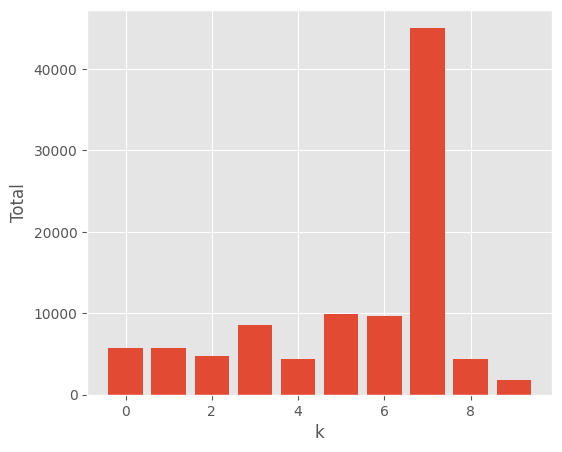

In [79]:
#calucuateing for the cluster counts
cluster_counts =df_sentences["cluster"].value_counts()
#calculating the total counts
total_counts=cluster_counts.sum()
#Calucating the percentages
cluster_percentages =(cluster_counts/total_counts)*100
#Plottings
plt.figure(figsize =(6,5))
plt.bar(cluster_counts.index, cluster_counts.values)# use index and values to align data correctly
plt.xlabel("k")
plt.ylabel("Total")
plt.savefig("static/images/cluster_count.png")
plt.show()

# 10 random reviews from largest cluster

In [80]:
df_sentences[df_sentences.cluster==3].sample(10, random_state=0)

,all_sentences,Polarity,Sentiment,cluster
16397,i have tried other mild brews but this is the ...,0.327083,Positive,3
114418,i am surprised by the other reviews we found t...,0.229545,Positive,3
8665,if keurig brewers were evaluated by this parti...,-0.081481,Negative,3
63767,coffee preferences seem very personal and heat...,0.085476,Positive,3
92408,i was skeptical when i ordered these but could...,0.172727,Positive,3
38854,if you want a quick cup of coffee that is simp...,0.210833,Positive,3
17496,i have tried quite a few k cup products and th...,0.045312,Positive,3
107504,i have owned a keurig brewer for over years an...,0.090833,Positive,3
100235,a href http www amazon com gp product b kta c...,0.088542,Positive,3
76628,this is a bold coffee that unlike the strong c...,0.282292,Positive,3


# 10 random reviews from smallest cluster

In [81]:
df_sentences[df_sentences.cluster==1].sample(10, random_state=0)

,all_sentences,Polarity,Sentiment,cluster
36854,this is my wife s favorite tea hands down it h...,0.288360,Positive,1
35982,after having doctors confirm i have ibs i star...,0.164063,Positive,1
115855,i love this tea furthermore the company that p...,0.388889,Positive,1
37876,i like this tea quite a bit one of the few dri...,0.283333,Positive,1
59217,the sweet floral notes of the paris blend tea ...,0.246478,Positive,1
78967,i have been ordering k cups from coffee cow fo...,-0.027381,Negative,1
60380,excellent tea by far tastier than other green ...,0.245833,Positive,1
51327,i think this tea has an unpleasant taste and s...,0.022917,Positive,1
70054,i love iced tea and usually enjoy it home made...,0.106131,Positive,1
2643,this is the best iced green tea i ve ever had ...,0.405093,Positive,1


# Cluster_Topic Analysis

In [82]:
import nltk

df_sentences["words"] = df_sentences.all_sentences.apply(lambda x: nltk.word_tokenize(x))
df_sentences.head(2)

,all_sentences,Polarity,Sentiment,cluster,words
0,i have bought several of the vitality canned d...,0.450000,Positive,6,"[i, have, bought, several, of, the, vitality, ..."
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative,6,"[product, arrived, labeled, as, jumbo, salted,..."


In [83]:
from nltk.corpus import stopwords
import string
stop_words = set(stopwords.words("english"))
stop_words.update(["br", "href","good","great"]) # adding additinal words to stop_words 
global_stopwords = stopwords.words("english")

local_stopwords = [c for c in string.punctuation] +\
                  ['’', '``', '…', '...', "''", '‘', '“', '”', ".", "!!!", "!", "also", "https", "url", "na","br"]

In [84]:
%%time
import nltk
from nltk import word_tokenize, pos_tag
from collections import Counter

df_sentences["words"] = df_sentences.all_sentences.apply(lambda x: nltk.word_tokenize(x))
df_sentences["tagged_words"] = df_sentences.words.apply(lambda x: nltk.pos_tag(x))
counts = df_sentences['cluster'].value_counts()

# Define stopwords (you need to ensure global_stopwords and local_stopwords are defined)
global_stopwords = nltk.corpus.stopwords.words('english')  # example of getting global stopwords
local_stopwords = ['additional', 'local', 'stopwords','br']  # example of custom stopwords

def get_counter(dataframe, stopwords=[]):
    counter = Counter()
    for l in dataframe['tagged_words']:
        word_set = set()
        for t in l:
            word, tag = t[0].lower(), t[1]
            if word not in stopwords:
                word_set.add(word)
        counter.update(word_set)
    return counter

CPU times: total: 6min 18s
Wall time: 7min 56s


Check the top-30 most common words. If you have any words that you would not want to see, you can remove them by including them in the local_stopwords list above.

In [85]:
counter_max = get_counter(df_sentences[df_sentences['cluster'] == counts.idxmax()], global_stopwords + local_stopwords)
print(counter_max.most_common(30))


[('like', 14016), ('good', 12461), ('taste', 10838), ('great', 10461), ('one', 9919), ('flavor', 8748), ('love', 7547), ('would', 7231), ('really', 6733), ('get', 6378), ('much', 5918), ('little', 5917), ('make', 5709), ('use', 5681), ('also', 5567), ('time', 5493), ('tried', 5286), ('best', 5244), ('eat', 5136), ('well', 5114), ('even', 5096), ('try', 5000), ('better', 4807), ('buy', 4667), ('product', 4101), ('first', 4047), ('used', 4040), ('made', 3874), ('delicious', 3716), ('bought', 3657)]


# LDA Topic Modeling

Topic analysis is a machine learning technique that automatically assigns topics to text data topic analysis tools analyze
unstructured text, then process and sort this information, helping business discover the topics their customers mention most
often in relation to their product, brand or service

LDA  Latent Dirichlet Allocation is an example of topic model and is used to classify text in a document to a 
particular topic 
it builds a topic per document model and words per topic model, modeled as direichlet distributions

Choose the number of topics
set the number of topics you would like to get

In [86]:
num_topics = 8

Initialize a model object for LDA topic modeling

In [87]:

from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=num_topics, random_state=0)
lda

LatentDirichletAllocation(n_components=8, random_state=0)

In [88]:
#Fit the model using the input data
%time lda.fit(X)

CPU times: total: 2min 50s
Wall time: 4min 17s


LatentDirichletAllocation(n_components=8, random_state=0)

Examine the output of topic modeling

In [89]:
lda.components_

array([[0.12501541, 2.37388879, 0.12500006, ..., 0.12500058, 0.12500002,
        0.12500006],
       [1.17135984, 0.12507593, 0.12506485, ..., 0.12500043, 0.12500002,
        0.12551445],
       [0.12500171, 0.12500028, 0.12502033, ..., 0.12500134, 0.12500006,
        0.28605488],
       ...,
       [0.12500071, 0.12500005, 0.12500003, ..., 0.12500025, 0.12500001,
        0.12500002],
       [0.12501055, 0.12535415, 0.12518388, ..., 0.50729036, 0.12500002,
        0.12500004],
       [5.61229515, 0.12580497, 1.7966826 , ..., 0.13958656, 0.12500002,
        0.12500004]])

In [90]:
lda.components_.shape

(8, 55920)

In [91]:
def show_topics(model, feature_names, num_top_words):
    for topic_idx, topic_scores in enumerate(model.components_):
        print("***Topic {}:".format(topic_idx))
        print(" + ".join(["{:.2f} * {}".format(topic_scores[i], feature_names[i]) for i in topic_scores.argsort()[::-1][:num_top_words]]))
        print()

In [92]:
show_topics(lda, vectorizer.get_feature_names_out(), 10)

***Topic 0:
471.30 * chips + 422.19 * sauce + 383.61 * great + 377.49 * like + 376.65 * flavor + 357.29 * good + 322.94 * taste + 311.27 * salt + 303.86 * love + 256.63 * spicy

***Topic 1:
1056.64 * food + 1055.88 * dog + 705.04 * dogs + 618.74 * treats + 515.15 * cat + 500.75 * loves + 412.46 * cats + 366.66 * one + 355.45 * eat + 349.82 * love

***Topic 2:
352.07 * popcorn + 144.25 * toy + 100.65 * oil + 78.13 * dog + 73.31 * jerky + 70.77 * popper + 69.65 * rope + 66.93 * get + 64.88 * kernels + 61.39 * olive

***Topic 3:
64.91 * cashews + 61.22 * salt + 29.50 * nuts + 28.46 * sea + 28.14 * almonds + 26.73 * hair + 23.31 * emerald + 21.99 * ghee + 21.71 * salted + 20.94 * pepper

***Topic 4:
1493.48 * tea + 258.93 * teas + 246.90 * green + 150.59 * drink + 130.44 * flavor + 120.44 * grey + 115.68 * iced + 114.43 * good + 113.90 * earl + 109.82 * like

***Topic 5:
946.65 * like + 915.53 * taste + 817.60 * good + 743.82 * sugar + 700.67 * great + 689.42 * chocolate + 659.26 * flavor 

In [93]:
#!pip install pyldavis

In [94]:
# import pyLDAvis
# import pyLDAvis.sklearn
# pyLDAvis.enable_notebook()

In [95]:
#pyLDAvis.sklearn.prepare(lda, X, vectorizer)

Saliency: a measure of how much the term tells you about the topic
Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized
    by the probability of the topic
Bubble size: the importance of the topics, relative to the data


# Keyword Network Analysis

the keyword frequencies will be used as the node weights and the keyword co-occurrrence frequencies as teh edge weights

In [96]:
df_sentences.head(1)

,all_sentences,Polarity,Sentiment,cluster,words,tagged_words
0,i have bought several of the vitality canned d...,0.45,Positive,6,"[i, have, bought, several, of, the, vitality, ...","[(i, NNS), (have, VBP), (bought, VBN), (severa..."


In [97]:
import nltk
df_sentences["all_sentences"]=df_sentences["all_sentences"].astype(str)

df_sentences["words"]=df_sentences.all_sentences.apply(lambda x: nltk.word_tokenize(x))
df_sentences[["all_sentences","words"]].head(1)

,all_sentences,words
0,i have bought several of the vitality canned d...,"[i, have, bought, several, of, the, vitality, ..."


In [98]:

from nltk.corpus import stopwords
import string

global_stopwords = stopwords.words("english")

local_stopwords = [c for c in string.punctuation] +\
                  ['’', '``', '…', '...', "''", '‘', '“', '”', ".", "!!!", "!", "also", "https", "url", "na","br"]

In [99]:
from collections import Counter

###################################################################################
# The 'counter' object will have all the word count information. 
# The 'co_counter' object will have all the co-occurrence count information.
###################################################################################
counter = Counter()
co_counter = dict()

for l in df_sentences.words:
    word_set = set()
    
    for item in l:
        word = item.lower()
        
        if word not in (global_stopwords + local_stopwords):
            word_set.add(word)

    counter.update(word_set)
    
    ###################################################################################
    # Calculate co-occurrence count of two words and save it in 'co_counter' 
    ###################################################################################
    words = list(word_set)
    for word1 in words:
        if word1 not in co_counter:
            co_counter[word1] = dict()
        
        for word2 in words:

            ######################################
            # Skip if the two words are the same.
            ######################################
            if word1 == word2:
                continue
            
            if word2 not in co_counter[word1]:
                co_counter[word1][word2] = 1
            else:
                co_counter[word1][word2] += 1

check the top 30  most common words if you have any words that you would not want to see, you can remove them by including 
them in local_stopwords list above

In [100]:
counter.most_common(30)

[('like', 31335),
 ('good', 27991),
 ('great', 24221),
 ('taste', 23259),
 ('one', 22913),
 ('product', 21273),
 ('flavor', 19303),
 ('love', 18492),
 ('would', 17621),
 ('get', 15719),
 ('really', 14874),
 ('amazon', 14560),
 ('much', 14265),
 ('time', 12605),
 ('little', 12380),
 ('buy', 12192),
 ('coffee', 12192),
 ('best', 11873),
 ('tried', 11724),
 ('price', 11707),
 ('use', 11638),
 ('well', 11354),
 ('even', 11352),
 ('make', 11213),
 ('find', 11208),
 ('better', 11190),
 ('try', 10996),
 ('food', 10737),
 ('eat', 9560),
 ('first', 9491)]

# Create a graph Object

In [101]:
import networkx as nx
G = nx.Graph()

# Decide the number of nodes in the graph

In [102]:
#nodes corresponding to keywords
num_nodes = 20

# Define nodes and their weights for network visualization

In [103]:
nodes = [item[0] for item in counter.most_common(num_nodes)]
node_weights = [item[1] for item in counter.most_common(num_nodes)]

In [104]:
nodes,node_weights

(['like',
  'good',
  'great',
  'taste',
  'one',
  'product',
  'flavor',
  'love',
  'would',
  'get',
  'really',
  'amazon',
  'much',
  'time',
  'little',
  'buy',
  'coffee',
  'best',
  'tried',
  'price'],
 [31335,
  27991,
  24221,
  23259,
  22913,
  21273,
  19303,
  18492,
  17621,
  15719,
  14874,
  14560,
  14265,
  12605,
  12380,
  12192,
  12192,
  11873,
  11724,
  11707])

# Add nodes to the graph

In [105]:
for word in nodes: 
    G.add_node(word,weight=counter.get(word))

Add each node to G (graph), such that the weight parameter is set to the keyword frequency

In [106]:
G.nodes.data()# check what nodes are in G

NodeDataView({'like': {'weight': 31335}, 'good': {'weight': 27991}, 'great': {'weight': 24221}, 'taste': {'weight': 23259}, 'one': {'weight': 22913}, 'product': {'weight': 21273}, 'flavor': {'weight': 19303}, 'love': {'weight': 18492}, 'would': {'weight': 17621}, 'get': {'weight': 15719}, 'really': {'weight': 14874}, 'amazon': {'weight': 14560}, 'much': {'weight': 14265}, 'time': {'weight': 12605}, 'little': {'weight': 12380}, 'buy': {'weight': 12192}, 'coffee': {'weight': 12192}, 'best': {'weight': 11873}, 'tried': {'weight': 11724}, 'price': {'weight': 11707}})

# Add edges to the graph

In [107]:
for word1 in nodes:
    for word2 in nodes:
        if (word1 != word2) & (word2 in co_counter[word1]):
            G.add_edge(word1, word2, weight=co_counter[word1][word2])

For each pair of keywords in nodes, add an edge to G, such that the weight parameter is set to the co-occurrence frequency. Recall that an edge between two nodes represents the co-occurrence of the two keywords in the same document and that the weight of the edge is the co-occurrence frequency.

In [108]:
G.edges.data()     # Check what edges  are in G

EdgeDataView([('like', 'good', {'weight': 10531}), ('like', 'great', {'weight': 7281}), ('like', 'taste', {'weight': 10911}), ('like', 'one', {'weight': 9451}), ('like', 'product', {'weight': 7082}), ('like', 'flavor', {'weight': 8205}), ('like', 'love', {'weight': 5993}), ('like', 'would', {'weight': 7596}), ('like', 'get', {'weight': 6363}), ('like', 'really', {'weight': 7226}), ('like', 'amazon', {'weight': 4690}), ('like', 'much', {'weight': 6341}), ('like', 'time', {'weight': 4605}), ('like', 'little', {'weight': 5366}), ('like', 'buy', {'weight': 4468}), ('like', 'coffee', {'weight': 4657}), ('like', 'best', {'weight': 3790}), ('like', 'tried', {'weight': 5053}), ('like', 'price', {'weight': 3563}), ('good', 'great', {'weight': 6223}), ('good', 'taste', {'weight': 8469}), ('good', 'one', {'weight': 7524}), ('good', 'product', {'weight': 6381}), ('good', 'flavor', {'weight': 6618}), ('good', 'love', {'weight': 4870}), ('good', 'would', {'weight': 6162}), ('good', 'get', {'weight':

# Define edges and their weights for network visualization

In [109]:
edges = nx.get_edge_attributes(G, "weight").keys()
edges

dict_keys([('like', 'good'), ('like', 'great'), ('like', 'taste'), ('like', 'one'), ('like', 'product'), ('like', 'flavor'), ('like', 'love'), ('like', 'would'), ('like', 'get'), ('like', 'really'), ('like', 'amazon'), ('like', 'much'), ('like', 'time'), ('like', 'little'), ('like', 'buy'), ('like', 'coffee'), ('like', 'best'), ('like', 'tried'), ('like', 'price'), ('good', 'great'), ('good', 'taste'), ('good', 'one'), ('good', 'product'), ('good', 'flavor'), ('good', 'love'), ('good', 'would'), ('good', 'get'), ('good', 'really'), ('good', 'amazon'), ('good', 'much'), ('good', 'time'), ('good', 'little'), ('good', 'buy'), ('good', 'coffee'), ('good', 'best'), ('good', 'tried'), ('good', 'price'), ('great', 'taste'), ('great', 'one'), ('great', 'product'), ('great', 'flavor'), ('great', 'love'), ('great', 'would'), ('great', 'get'), ('great', 'really'), ('great', 'amazon'), ('great', 'much'), ('great', 'time'), ('great', 'little'), ('great', 'buy'), ('great', 'coffee'), ('great', 'best

In [110]:
edge_weights = nx.get_edge_attributes(G, "weight").values()
edge_weights

dict_values([10531, 7281, 10911, 9451, 7082, 8205, 5993, 7596, 6363, 7226, 4690, 6341, 4605, 5366, 4468, 4657, 3790, 5053, 3563, 6223, 8469, 7524, 6381, 6618, 4870, 6162, 5265, 5897, 4264, 4739, 4018, 4314, 3952, 3768, 3281, 3811, 4301, 6369, 5481, 5900, 5202, 5021, 4065, 4124, 3823, 3910, 3423, 3243, 3264, 2945, 3129, 2800, 2716, 3914, 6449, 5337, 5789, 4521, 5367, 4230, 4812, 3276, 4414, 3114, 3658, 3213, 3478, 2945, 3783, 2542, 5435, 5410, 4648, 5641, 5141, 4538, 4119, 4443, 4191, 3909, 3405, 3200, 3529, 4199, 2926, 4101, 3761, 5021, 3768, 3536, 5285, 3614, 3295, 2867, 3071, 1963, 2307, 2535, 3149, 3869, 4211, 3402, 3909, 2737, 3677, 2623, 3260, 2446, 3335, 2572, 3247, 2139, 3300, 3335, 3021, 3089, 2979, 2549, 2555, 2501, 2224, 2300, 2259, 2137, 3887, 3802, 2871, 3754, 3024, 3152, 3447, 2285, 1930, 2634, 2414, 3207, 3255, 3277, 2968, 2799, 2425, 2039, 2182, 2305, 2461, 2315, 3026, 2365, 2654, 2145, 1853, 1669, 2379, 1866, 2665, 2591, 1892, 2823, 2045, 2338, 1954, 3716, 2435, 2586, 2

In [111]:
edge_weights = [item /55 for item in edge_weights]
edge_weights

[191.47272727272727,
 132.38181818181818,
 198.38181818181818,
 171.83636363636364,
 128.76363636363635,
 149.1818181818182,
 108.96363636363637,
 138.1090909090909,
 115.69090909090909,
 131.38181818181818,
 85.27272727272727,
 115.2909090909091,
 83.72727272727273,
 97.56363636363636,
 81.23636363636363,
 84.67272727272727,
 68.9090909090909,
 91.87272727272727,
 64.78181818181818,
 113.14545454545454,
 153.98181818181817,
 136.8,
 116.01818181818182,
 120.32727272727273,
 88.54545454545455,
 112.03636363636363,
 95.72727272727273,
 107.21818181818182,
 77.52727272727273,
 86.16363636363636,
 73.05454545454545,
 78.43636363636364,
 71.85454545454546,
 68.50909090909092,
 59.654545454545456,
 69.2909090909091,
 78.2,
 115.8,
 99.65454545454546,
 107.27272727272727,
 94.58181818181818,
 91.2909090909091,
 73.9090909090909,
 74.98181818181818,
 69.50909090909092,
 71.0909090909091,
 62.236363636363635,
 58.96363636363636,
 59.345454545454544,
 53.54545454545455,
 56.89090909090909,
 50.

# Plot the graph

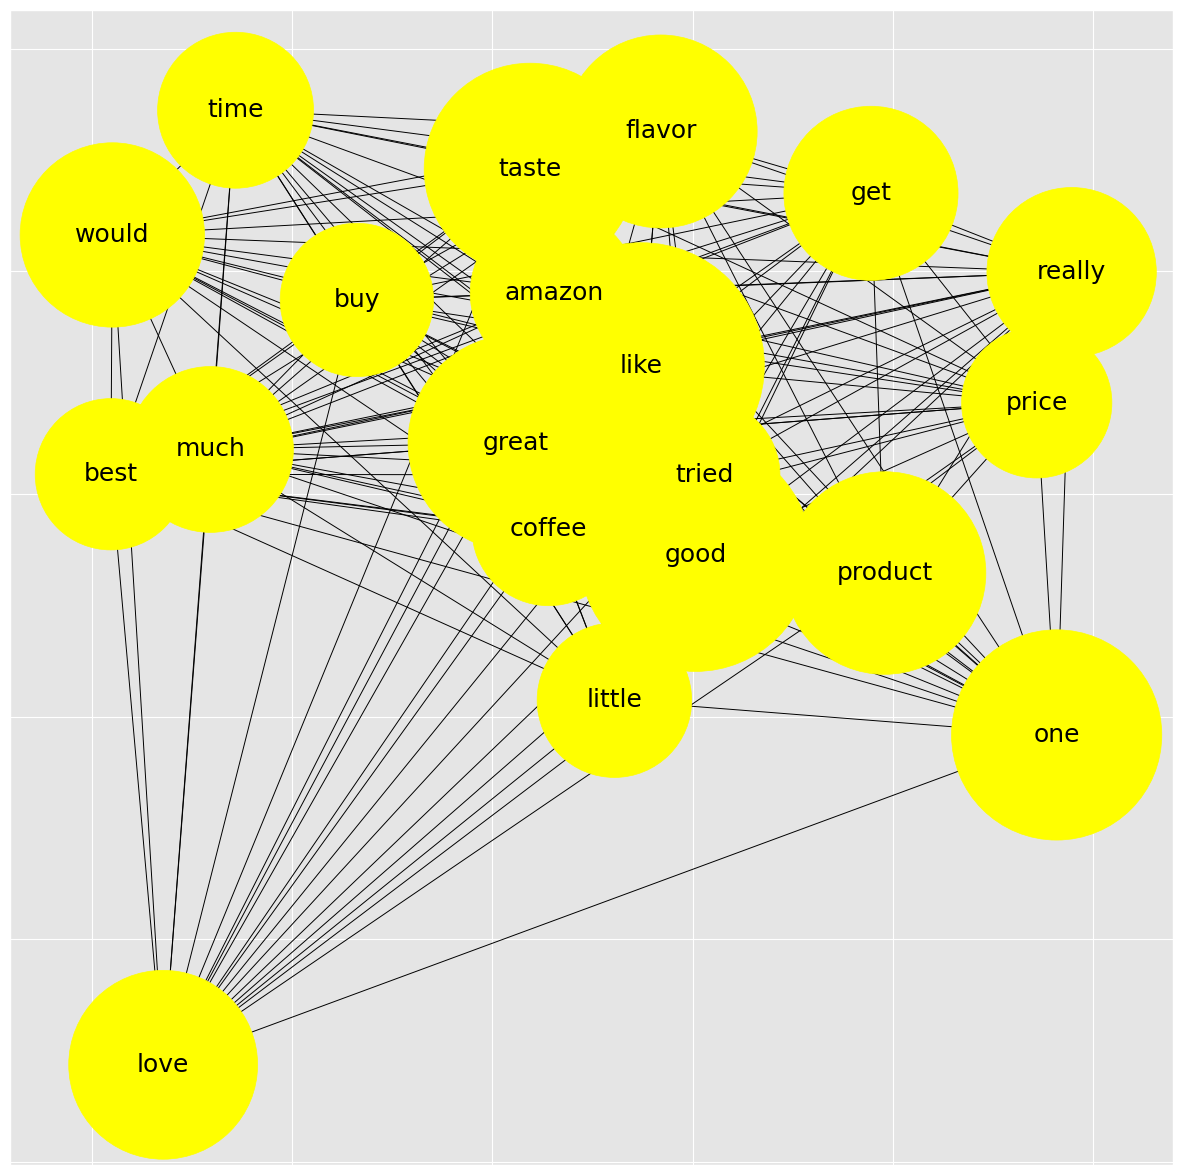

In [115]:
plt.figure(figsize=(15, 15))
nx.draw_networkx(G, pos=nx.random_layout(G, seed=0), 
                 nodelist=nodes, node_size=node_weights, edgelist=edges, width=0.7 ,#edge_weights,
                 node_color="yellow", with_labels=True, font_size=18)
plt.savefig("static/images/node_edge_network.png")
plt.show()
plt.close()